### Business Questions:
* Can enrollment management recruit specific markets / demographics with a more targeted approach? 
* Should we increase recruitment efforts for specific target market? 
* Can we identify trends as to when we could benefit from increased marketing efforts to prevent cancelled applications? 
 OR - 
* Can we increase recruitment toward a specific demographic (within our non-traditional students) to prevent application cancellations and increase enrollment / admission

>  * Can we better target non-traditional students? 
>  * Can we increase Freshmen admits by increasing recruitment efforts?

In [122]:
# Import Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import chart_studio.plotly as py
from chart_studio.plotly import iplot
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

# Regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import statsmodels
from scipy import stats
from pandas.plotting import scatter_matrix
import scipy.stats as stats

# Classification Model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

### 1. Import Dataset 
Data Description:
* Collected undergraduate student applicant data from the Kansas State University Student Information System (KSIS) 
* Student applicant demographics
* Years: 2012 through 2019

Data Fields:
> * ID: equivalent to primary key identifier
> * State: continental US States only
> * Age 
> * Gender
> * Citizenship: As disclosed by student during application process; for US students populated with 'US'
> * Ethnicity: as given by student during application process
> * Residency: IS = In-State (KS); OS = Out of State (non-KS)
> * Admit Term
> * College: college and program that student has applied to
> * Degree / Non-Degree: status of application for degree program vs. non-degree program (e.g. certificate)
> * Application Center: K-State campust to which student has applied
> * Admit Type: traditional freshmen, re-admits, online students, or transfer students
> * Status: current status of student's application / program 
> * Application Date: date when application was submitted to / received by K-State
> * Admit Status: derived from now deleted column 'Admit Date', which if exists = 'Admitted', otherwise: 'Not Admitted'
> * Enrolled Status: derived from now deleted column 'Enrollment Date', which if exists = 'Enrolled', otherwise: 'Not Enrolled'
> * Withdrew?: did the student at any point withdraw after having been admitted

Pre-Processing Steps:
* Data pre-cleaned via Excel:
> * Verified data consistency, integrity, and accuracy
> * Deleted identifing information and non-demographic data
> * Original 185 data points reduced to 17

In [123]:
# Read and save master data file to continue processing
stdnt_data = pd.read_excel('Student Data 2012 - 2019.xlsx')
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
0,132441,KS,70.0,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16,Admitted,Not Enrolled,N
1,921672,CA,69.0,M,US,White,OS,Fall 2019,Agriculture,Non-Degree,Global Campus,Online,Active,2019-07-25,Admitted,Not Enrolled,N
2,922050,KS,67.0,M,US,White,IS,Fall 2019,Technology & Aviation,Non-Degree,Polytechnic,Freshman,Active,2019-08-05,Admitted,Enrolled,N
3,922182,KS,63.0,F,US,White,IS,Fall 2019,Health & Human Sciences,Non-Degree,Global Campus,Transfer,Active,2019-08-07,Admitted,Not Enrolled,N
4,905009,KS,63.0,M,US,White,IS,Fall 2019,Arts & Sciences,Degree,Manhattan Main Campus,Readmit,Active,2019-05-21,Admitted,Enrolled,N


### 2. Data Transformation and Cleaning

In [124]:
# Verify data types in file
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                101086 non-null  object        
 2   Age                  111614 non-null  float64       
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

> Looking at the counts we can see that there are some null values in the 'State' and 'Age' columns.

In [125]:
# Fill cells with null values 
stdnt_data = stdnt_data.fillna({'State':'No State'})

In [126]:
# Find mean age to fill null value(s)
stdnt_data['Age'].mean()

20.38497858691562

In [127]:
# Replace null values with mean age (rounded)
stdnt_data = stdnt_data.fillna({'Age':20})

In [128]:
#Verify no remaining null values
stdnt_data.isnull().sum()

ID                     0
State                  0
Age                    0
Gender                 0
Citizenship            0
Ethnicity              0
Residency              0
Admit Term             0
College                0
Degree / Non-Degree    0
Application Center     0
Admit Type             0
Status                 0
Application Date       0
Admit Status           0
Enrolled Status        0
Withdrew?              0
dtype: int64

In [129]:
# Change data type of age from float to int; this removes the decimal
stdnt_data['Age'] = stdnt_data['Age'].astype('int64')
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                111615 non-null  object        
 2   Age                  111615 non-null  int64         
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

In [130]:
stdnt_data.head(1)

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
0,132441,KS,70,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16,Admitted,Not Enrolled,N


In [131]:
# Basic statistics of numeric column 'Age'
stdnt_data['Age'].describe()

count    111615.000000
mean         20.384975
std           5.276311
min          13.000000
25%          18.000000
50%          18.000000
75%          20.000000
max          80.000000
Name: Age, dtype: float64

> This basic statistical overview of age, shows us that we have a minimum age value of 13. While we may find during later analysis that this inaccurate, at this time, since we have high school admit types, we will assume it is in fact an accurate depiction of age for an applicant. Therefore we will keep this and not make any changes at this time. 

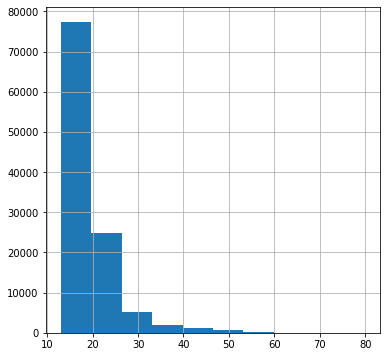

In [132]:
# Histogram of age distribution
stdnt_data['Age'].hist(figsize=(6,6))

> This visual shows that majority of students are around the age of 20 which agrees with our mean age of 20.38 years.

### 3. Verify Data Accuracy and Integrity
> Use of Group By to allow for quick overview of counts

In [133]:
# Grouping by admit status and enrolled status allows for counts and checking for inaccuracies;
# Students who are not admitted should not show as 'Enrolled'; 
Adm_Enrolled = stdnt_data.groupby(['Admit Status', 'Enrolled Status']).size()
Adm_Enrolled

Admit Status  Enrolled Status
Admitted      Enrolled           51151
              Not Enrolled       55255
Not Admitted  Not Enrolled        5209
dtype: int64

> Results show that we have indeed no enrollments for non-admits

In [134]:
# Ensuring no withdrawals for non-admits
Adm_Withdr = stdnt_data.groupby(['Admit Status', 'Withdrew?']).size()
Adm_Withdr

Admit Status  Withdrew?
Admitted      N            105536
              Y               870
Not Admitted  N              5209
dtype: int64

> Results show that we have no withdrawals for non-admits and a total of 870 withdrawals for previously admitted students

### We now have a dataset that no longer contains any null values. The validity of the data has been verified by looking at groupings and counts and we can proceed with further analysis. 

### 4. Exploratory Data Analysis

In [135]:
# Group by Status
status = stdnt_data.groupby('Status').size()
status

Status
Active                  61082
Admitted                26322
Application Deferred      552
Applied                  2646
Cancelled               20123
Denied                    819
Discontinued               71
dtype: int64

In [136]:
# Group by Admit Type
admit_type = stdnt_data.groupby('Admit Type').size()
admit_type

Admit Type
Freshman         67874
High School       1665
International    10300
Online            7127
Other               36
Readmit           6000
Transfer         18613
dtype: int64

In [137]:
# Group by Age
age = stdnt_data.groupby('Age').size()
age

Age
13       1
14      14
15     105
16     440
17    2639
      ... 
71       1
72       2
74       2
77       1
80       1
Length: 63, dtype: int64

In [138]:
# Group by Ethnicity for preliminary counts
eth = stdnt_data.groupby('Ethnicity').size()
eth

Ethnicity
African American              7277
Asian                         8709
Hawaiian Pacific Islander      162
Hispanic                     10558
Multi Racial                  4333
Native American                550
Not Specified                 2517
WHITE                            1
White                        77508
dtype: int64

In [139]:
# Group by College / Program
college = stdnt_data.groupby('College').size()
college

College
Agriculture                14085
Architecture                2740
Arts & Sciences            38949
Business Administration    14601
Education                   5632
Engineering                18290
Health & Human Sciences    12005
Technology & Aviation       5313
dtype: int64

In [140]:
# Group by Admit Term
term = stdnt_data.groupby('Admit Term').size()
term

Admit Term
Fall 2012      12556
Fall 2013      12714
Fall 2014      12671
Fall 2015      11680
Fall 2016      11382
Fall 2017      10368
Fall 2018      12233
Fall 2019      12037
Spring 2012      648
Spring 2013     2554
Spring 2014     2275
Spring 2015     2088
Spring 2016     1997
Spring 2017     1888
Spring 2018     2442
Spring 2019     2082
dtype: int64

In [141]:
# Dropping values that are insignificant in further analysis
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Admit Type'] == "High School"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Admit Type'] == "Other"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Age'] < 17].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Age'] > 60].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Ethnicity']== "WHITE"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Ethnicity']== "Not Specified"].index)
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
7,919451,MO,60,F,US,African American,OS,Fall 2019,Business Administration,Degree,Global Campus,Online,Cancelled,2019-06-08,Not Admitted,Not Enrolled,N
8,172358,TX,60,F,US,White,OS,Fall 2019,Agriculture,Degree,Global Campus,Online,Active,2019-04-16,Admitted,Not Enrolled,N
9,135435,KS,59,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Manhattan Main Campus,Readmit,Active,2018-09-18,Admitted,Not Enrolled,N
10,922350,KS,58,F,US,White,IS,Fall 2019,Arts & Sciences,Degree,Manhattan Main Campus,Transfer,Applied,2019-08-09,Not Admitted,Not Enrolled,N
11,916358,TX,58,M,US,White,OS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-04-30,Not Admitted,Not Enrolled,N


In [142]:
# Replacing categorical values with numerical values (adding new column for College: College2)
stdnt_data['Admit Status2'] = stdnt_data['Admit Status'].map({'Admitted': 1, 'Not Admitted': 0})
stdnt_data['Enrolled Status2'] = stdnt_data['Enrolled Status'].map({'Enrolled': 1, 'Not Enrolled': 0})
stdnt_data['Withdrew?2'] = stdnt_data['Withdrew?'].map({'Y': 1, 'N': 0})
stdnt_data['Status2'] = stdnt_data['Status'].map({'Active': 1, 'Admitted': 2, 'Application Deferred': 3, 'Applied': 4, 'Cancelled': 5, 'Denied': 6, 'Discontinued':7})
stdnt_data['Residency2'] = stdnt_data['Residency'].map({'IS': 0, 'OS':1})
stdnt_data['Admit Type2'] = stdnt_data['Admit Type'].map({'Freshman': 1, 'International': 2, 'Online': 3, 'Transfer': 4, 'Readmit': 5})
stdnt_data['Gender2'] = stdnt_data['Gender'].map({'F': 0, 'M': 1})
stdnt_data['Degree / Non-Degree2'] = stdnt_data['Degree / Non-Degree'].map({'Degree': 1, 'Non-Degree': 0})
stdnt_data['Ethnicity2'] = stdnt_data['Ethnicity'].map({'Native American': 1, 'Hawaiian Pacific Islander': 2, 'Multi Racial': 3, 'African American': 4, 'Asian':5, 'Hispanic': 6, 'White': 7})
stdnt_data['EthnicityNA'] = stdnt_data['Ethnicity'].map({'Native American': 1, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['EthnicityHPI'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 1, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['EthnicityMR'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 1, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['EthnicityAA'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 1, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['EthnicityAS'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 1, 'Hispanic': 0, 'White': 0})
stdnt_data['EthnicityHS'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 1, 'White': 0})
stdnt_data['EthnicityWH'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 1})
stdnt_data['Ethnicity'] = stdnt_data['Ethnicity'].map({'Native American': 'NA', 'Hawaiian Pacific Islander': 'HPI', 'Multi Racial': 'MR', 'African American': 'AA', 'Asian': 'AS', 'Hispanic': 'HS', 'White': 'WH'})
stdnt_data['College2'] = stdnt_data['College'].map({'Architecture': 1, 'Technology & Aviation': 2, 'Education': 3, 'Health & Human Sciences': 4, 'Agriculture': 5, 'Business Administration': 6, 'Engineering': 7, 'Arts & Sciences': 8})
stdnt_data['College'] = stdnt_data['College'].map({'Architecture': 'AR', 'Technology & Aviation': 'TA', 'Education': 'ED', 'Health & Human Sciences': 'HHS', 'Agriculture': 'AG', 'Business Administration': 'BA', 'Engineering': 'ENG', 'Arts & Sciences': 'AS'})
stdnt_data['Admit Term2'] = stdnt_data['Admit Term'].map({'Fall 2012': 2012, 'Spring 2012': 2012, 'Fall 2013': 2013, 'Spring 2013': 2013, 'Fall 2014': 2014, 'Spring 2014': 2014, 'Fall 2015': 2015, 'Spring 2015': 2015, 'Fall 2016': 2016, 'Spring 2016': 2016, 'Fall 2017': 2017, 'Spring 2017': 2017, 'Fall 2018': 2018, 'Spring 2018': 2018, 'Fall 2019': 2019, 'Spring 2019': 2019})

##### Categorical - Numerical Equivalents:
Admit Status:
* Admitted - 1
* Not Admitted - 0

Enrolled Status:
* Enrolled - 1
* Not Enrolled - 2

Withdrew:
* Yes - 1
* No - 0

Status:
* Active - 1
* Admitted - 2
* Application Deferred - 3
* Applied - 4
* Cancelled - 5
* Denied - 6
* Discontinued - 7

Residency:
* IS - 1
* OS - 2

Admit Type:
* Freshman - 1
* International - 2
* Online - 3
* Transfer - 4
* Readmit - 5

Gender:
* Female - 1
* Male - 2

Ethnicity (by ascending counts):
* Native American - 1
* Hawaiian Pacific Islander - 2
* Multi Racial - 3
* African American - 4
* Asian - 5 
* Hispanic - 6
* White - 7

College:
* Architecture - 1
* Technology & Aviation - 2
* Education - 3
* Health & Human Sciences - 4
* Agriculture - 5
* Business Administration - 6
* Engineering - 7
* Arts & Sciences - 8

In [143]:
#Verifying accuracy of data after adding numerical columns
stdnt_data.head(5)

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,...,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2,Admit Term2
7,919451,MO,60,F,US,AA,OS,Fall 2019,BA,Degree,...,4,0,0,0,1,0,0,0,6,2019
8,172358,TX,60,F,US,WH,OS,Fall 2019,AG,Degree,...,7,0,0,0,0,0,0,1,5,2019
9,135435,KS,59,M,US,AA,IS,Fall 2019,HHS,Degree,...,4,0,0,0,1,0,0,0,4,2019
10,922350,KS,58,F,US,WH,IS,Fall 2019,AS,Degree,...,7,0,0,0,0,0,0,1,8,2019
11,916358,TX,58,M,US,WH,OS,Fall 2019,HHS,Degree,...,7,0,0,0,0,0,0,1,4,2019


In [144]:
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107319 entries, 7 to 111612
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    107319 non-null  int64         
 1   State                 107319 non-null  object        
 2   Age                   107319 non-null  int64         
 3   Gender                107319 non-null  object        
 4   Citizenship           107319 non-null  object        
 5   Ethnicity             107319 non-null  object        
 6   Residency             107319 non-null  object        
 7   Admit Term            107319 non-null  object        
 8   College               107319 non-null  object        
 9   Degree / Non-Degree   107319 non-null  object        
 10  Application Center    107319 non-null  object        
 11  Admit Type            107319 non-null  object        
 12  Status                107319 non-null  object        
 13 

### 4.a) Correlation Analysis

In [145]:
# For the purpose of this analysis, will remove ID column and save in new dataframe
stdnt_data2 = stdnt_data.drop(['ID'], axis=1).reset_index(drop=True)
stdnt_data2.head()

,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,...,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2,Admit Term2
0,MO,60,F,US,AA,OS,Fall 2019,BA,Degree,Global Campus,...,4,0,0,0,1,0,0,0,6,2019
1,TX,60,F,US,WH,OS,Fall 2019,AG,Degree,Global Campus,...,7,0,0,0,0,0,0,1,5,2019
2,KS,59,M,US,AA,IS,Fall 2019,HHS,Degree,Manhattan Main Campus,...,4,0,0,0,1,0,0,0,4,2019
3,KS,58,F,US,WH,IS,Fall 2019,AS,Degree,Manhattan Main Campus,...,7,0,0,0,0,0,0,1,8,2019
4,TX,58,M,US,WH,OS,Fall 2019,HHS,Degree,Global Campus,...,7,0,0,0,0,0,0,1,4,2019


In [146]:
# Correlation Table
stdnt_data2.corr()

,Age,Admit Status2,Enrolled Status2,Withdrew?2,Status2,Residency2,Admit Type2,Gender2,Degree / Non-Degree2,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2,Admit Term2
Age,1.000000,-0.078053,0.067387,0.090765,-0.141816,0.102301,0.484503,0.000018,-0.342222,-0.041263,0.022682,0.017033,-0.016832,0.055457,-0.000169,0.028091,-0.046524,-0.083816,0.013519
Admit Status2,-0.078053,1.000000,0.199734,0.019225,-0.331095,-0.113982,-0.040483,0.006977,-0.025845,0.118247,-0.015899,-0.009948,-0.013463,-0.148645,0.000666,-0.039954,0.116679,0.040106,-0.286549
Enrolled Status2,0.067387,0.199734,1.000000,-0.071499,-0.639739,-0.259182,0.180433,0.026499,-0.060974,0.131670,-0.002300,-0.002476,-0.019272,-0.093126,-0.115912,-0.030557,0.149388,-0.033796,-0.064561
Withdrew?2,0.090765,0.019225,-0.071499,1.000000,-0.055717,0.009156,0.064959,-0.000004,-0.064961,-0.000732,-0.000209,-0.000640,-0.001978,0.002541,0.001686,-0.000619,-0.001066,-0.016636,0.016605
Status2,-0.141816,-0.331095,-0.639739,-0.055717,1.000000,0.152496,-0.236926,-0.033414,0.124955,-0.067856,0.003097,-0.005382,0.008829,0.060842,0.048464,0.008362,-0.071768,0.010965,0.085836
Residency2,0.102301,-0.113982,-0.259182,0.009156,0.152496,1.000000,-0.015801,-0.023927,-0.160340,-0.215775,0.002409,0.015631,-0.012732,0.148119,0.260078,0.044227,-0.262151,-0.060594,0.037531
Admit Type2,0.484503,-0.040483,0.180433,0.064959,-0.236926,-0.015801,1.000000,0.031328,-0.163643,-0.012811,0.013300,0.012218,-0.007033,0.007787,0.007358,0.010298,-0.015496,-0.055637,-0.016019
Gender2,0.000018,0.006977,0.026499,-0.000004,-0.033414,-0.023927,0.031328,1.000000,0.051637,-0.012263,-0.007339,-0.003576,-0.015940,0.016955,0.044220,-0.019289,-0.014887,0.051385,-0.015053
Degree / Non-Degree2,-0.342222,-0.025845,-0.060974,-0.064961,0.124955,-0.160340,-0.163643,0.051637,1.000000,0.008793,-0.003921,0.002382,0.019860,0.008365,-0.026901,-0.055935,0.039817,-0.004221,0.006270
Ethnicity2,-0.041263,0.118247,0.131670,-0.000732,-0.067856,-0.215775,-0.012811,-0.012263,0.008793,1.000000,-0.316350,-0.140040,-0.565689,-0.522774,-0.329899,-0.094066,0.851239,-0.053569,-0.022617


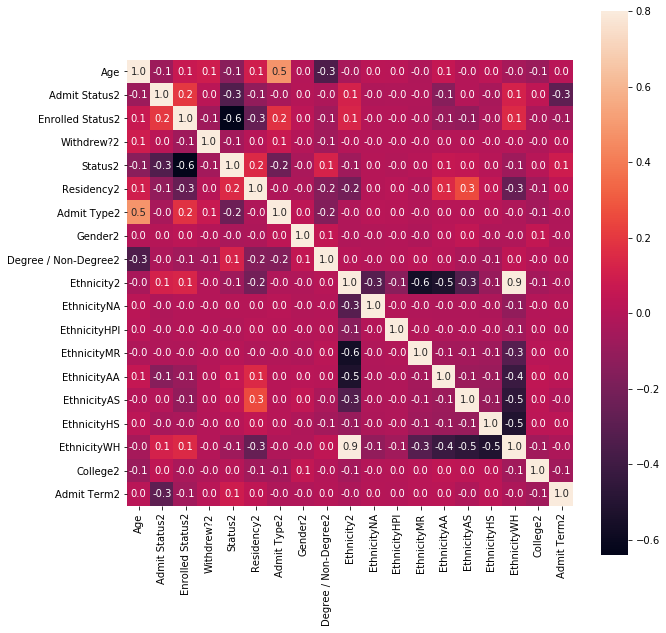

In [147]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(stdnt_data2.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

The above heatmap and correlation analysis shows us that **Status and Residency** have a positive correlation, as does **Age and Admit Type**. The latter indicates that as age increases so does the tendency for students to be either a Readmit or Transfer admit.  **Residency and Enrolled Status** however, have a negative correlation, as well as **Status and Admit Type.**
I think at this time it would be useful to analyze by admit type. This will allow for a in-depth view of the various factors, and also reduce the skewdness of the data as it is predominantely Freshmen and under the age of 20. 

#### Creating datasets for different cohorts of students:
> * Freshmen - Domestic
> * Non-Traditional - Domestic
> * International

In [148]:
# Create Datasets for admit types freshmen, non-traditional, and international students
Fresh = stdnt_data2.drop(stdnt_data2[stdnt_data2['Admit Type2']!= 1].index).reset_index(drop=True)
Fresh = Fresh.drop(Fresh[Fresh['Age']>19].index).reset_index(drop=True)
NonTrad = stdnt_data2.drop(stdnt_data2[stdnt_data2['Admit Type']== 1].index).reset_index(drop=True)
NonTrad = stdnt_data2.drop(stdnt_data2[stdnt_data2['Admit Type']== 2].index).reset_index(drop=True)
NonTrad = stdnt_data2.drop(stdnt_data2[stdnt_data2['Age'] < 20].index).reset_index(drop=True)
Int = stdnt_data2.drop(stdnt_data2[stdnt_data2['Admit Type2']!= 2].index).reset_index(drop=True)

### Domestic Cohort Analysis

In [149]:
frsloc = pd.DataFrame({'count' : Fresh.groupby( [ "State"]).size()}).reset_index()
nontradloc = pd.DataFrame({'count' : NonTrad.groupby( [ "State"]).size()}).reset_index()

In [150]:
frsloc

,State,count
0,AK,35
1,AL,49
2,AR,190
3,AZ,201
4,CA,1415
5,CO,1607
6,CT,94
7,DC,19
8,DE,34
9,FL,258


In [151]:
#Dropping KS and No State from freshmen dataset to prevent skewdness of data
frsloc = frsloc.drop(frsloc[frsloc['State']== "No State"].index)
frsloc = frsloc.drop(frsloc[frsloc['State']== "KS"].index)
nontradloc = nontradloc.drop(nontradloc[nontradloc['State']== "No State"].index)
nontradloc = nontradloc.drop(nontradloc[nontradloc['State']== "KS"].index)

In [152]:
fig = px.choropleth(frsloc,  
                    locations="State",  
                    color="count",  
                    hover_name="count", 
                    locationmode = 'USA-states',
                    color_continuous_scale="BuPu") 
                
fig.update_layout(
    title_text = 'App Counts by State for Freshmen',
    geo_scope='usa',  
)
fig.show() 

In [153]:
fig = px.choropleth(nontradloc,  
                    locations="State",  
                    color="count",  
                    hover_name="count", 
                    locationmode = 'USA-states',
                    color_continuous_scale="BuPu") 
                
fig.update_layout(
    title_text = 'App Counts by State for Non-Traditional Students',
    geo_scope='usa',  
)
fig.show() 

In [154]:
Fresh.head(2)

,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,...,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2,Admit Term2
0,KS,19,F,US,WH,IS,Fall 2019,BA,Degree,Manhattan Main Campus,...,7,0,0,0,0,0,0,1,6,2019
1,KS,19,M,US,AS,OS,Fall 2019,ED,Degree,Manhattan Main Campus,...,5,0,0,0,0,1,0,0,3,2019


In [155]:
NonTrad.head(2)

,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,...,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2,Admit Term2
0,MO,60,F,US,AA,OS,Fall 2019,BA,Degree,Global Campus,...,4,0,0,0,1,0,0,0,6,2019
1,TX,60,F,US,WH,OS,Fall 2019,AG,Degree,Global Campus,...,7,0,0,0,0,0,0,1,5,2019


In [156]:
Fresh = Fresh.drop(['State','Admit Term', 'Admit Term2','Application Center', 'Admit Type', 'Admit Type2'], axis=1)
NonTrad = NonTrad.drop(['State','Admit Term', 'Admit Term2','Application Center','Admit Type'], axis=1)
Int = Int.drop(['State','Admit Term', 'Admit Term2','Application Center', 'Admit Type', 'Admit Type2'], axis=1)
Fresh.head()

,Age,Gender,Citizenship,Ethnicity,Residency,College,Degree / Non-Degree,Status,Application Date,Admit Status,...,Degree / Non-Degree2,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2
0,19,F,US,WH,IS,BA,Degree,Active,2018-08-30,Admitted,...,1,7,0,0,0,0,0,0,1,6
1,19,M,US,AS,OS,ED,Degree,Applied,2018-10-31,Not Admitted,...,1,5,0,0,0,0,1,0,0,3
2,19,M,US,WH,IS,BA,Degree,Applied,2018-11-06,Not Admitted,...,1,7,0,0,0,0,0,0,1,6
3,19,M,US,AS,IS,ED,Degree,Active,2018-11-18,Admitted,...,1,5,0,0,0,0,1,0,0,3
4,19,F,US,WH,OS,AS,Degree,Active,2019-02-16,Admitted,...,1,7,0,0,0,0,0,0,1,8


In [157]:
# Creating datasets for each cohort retaining numerical categorical values only for each
Fresh2 = Fresh.drop(['Admit Status','Gender', 'Ethnicity','College', 'Degree / Non-Degree', 'Citizenship', 'Residency', 'Status', 'Enrolled Status', 'Withdrew?'], axis=1)
NonTrad2 = NonTrad.drop(['Admit Status','Gender', 'Ethnicity','College', 'Degree / Non-Degree', 'Citizenship', 'Residency', 'Status', 'Enrolled Status', 'Withdrew?'], axis=1)
Int2 = Int.drop(['Admit Status','Gender', 'Ethnicity','College', 'Degree / Non-Degree', 'Citizenship', 'Residency', 'Status', 'Enrolled Status', 'Withdrew?'], axis=1)

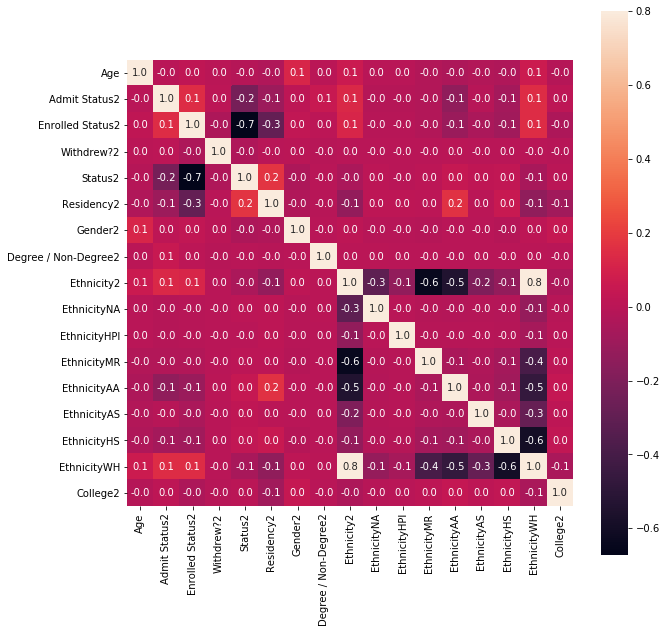

In [158]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Fresh.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

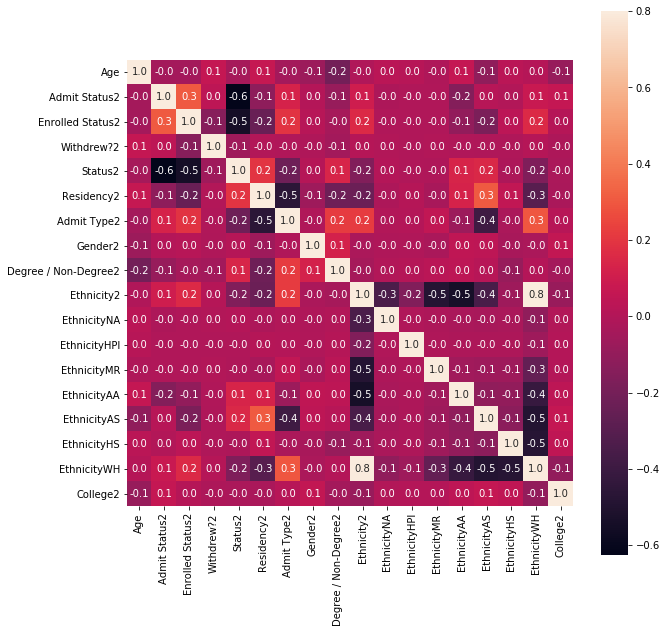

In [159]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(NonTrad.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

### Taking a Closer Look - Correlation between two columns & Histogram visualizations: 
#### Age & Ethnicity

In [160]:
# Age & Ethnicity for Freshmen
Fresh[['Age', 'Ethnicity2']].corr()

,Age,Ethnicity2
Age,1.000000,0.059348
Ethnicity2,0.059348,1.000000


In [161]:
# Age & Ethnicity for Non-Traditional Students
NonTrad[['Age', 'Ethnicity2']].corr()

,Age,Ethnicity2
Age,1.000000,-0.002282
Ethnicity2,-0.002282,1.000000


When looking at the freshmen and non-traditional student data, we can see that a strong positive correlation exists for the freshmen data, while a negative correlation exists for the non-traditional students. 

(array([13234.,  6013.,  3511.,  2266.,  1629.,  1321.,   969.,   768.,
          612.,   487.,   418.,   350.,   289.,   234.,   198.,   175.,
          121.,   108.,    75.,    64.]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44.,
        46., 48., 50., 52., 54., 56., 58., 60.]),
 <a list of 20 Patch objects>)

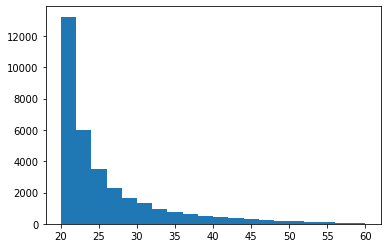

In [162]:
plt.hist(NonTrad['Age'], bins=20)

#### College and Ethnicity

In [163]:
Fresh[['College2', 'Age']].corr()

,College2,Age
College2,1.000000,-0.010866
Age,-0.010866,1.000000


In [164]:
NonTrad[['College2', 'Age']].corr()

,College2,Age
College2,1.000000,-0.087517
Age,-0.087517,1.000000


While both are negatively correlated, the factor increases for non-traditional admit types. This may indicate that freshmen tend to be undecided, entering the 'open options' track for Arts & Sciences while the non-traditional students tend to already be focused on a given track and program by the time they are admitted into the university and the respective college given their higher age.

(array([50489.,  1538.,     0.,  2896.,     0.,  6159.,  3997.,     0.,
          292.,    77.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

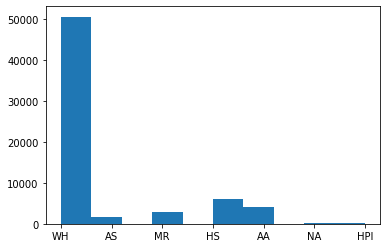

In [165]:
plt.hist(Fresh['Ethnicity'])

(array([ 2764., 21360.,     0.,  1118.,     0.,  3566.,   217.,     0.,
         3742.,    75.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

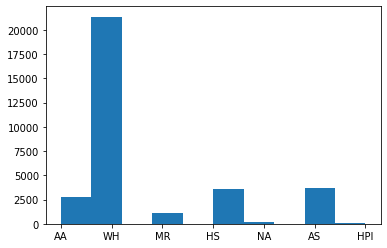

In [166]:
plt.hist(NonTrad['Ethnicity'])

(array([ 8259.,  3478., 23376.,     0.,  5990., 12590.,     0.,  8003.,
         1624.,  2128.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

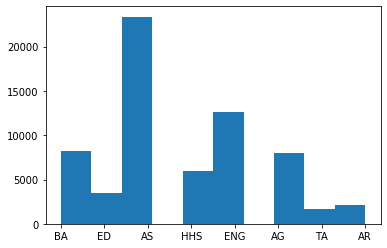

In [167]:
plt.hist(Fresh['College'])

(array([ 4113.,  5001.,  4928.,     0., 11327.,  2097.,     0.,  1585.,
          390.,  3401.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

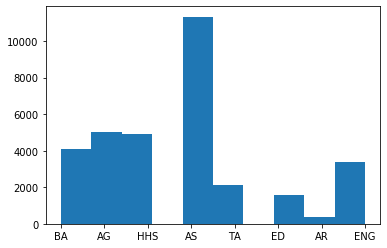

In [168]:
plt.hist(NonTrad['College'])

By taking a look at the grouped distribution it is obvious right away, that for traditional Freshmen, the students are predominantely white across all colleges. Once we look at the other admit types, the distribution, while still skewed towards white students, are now showing increases in other ethnicities for some of the colleges. Specifically, for the following colleges: Architecture (1), Business Administration (6), and Engineering (7).  

#### Gender and College / Ethnicity

In [169]:
gen = Fresh.groupby('Gender').size()
gen

Gender
F    34429
M    31019
dtype: int64

In [170]:
gen2 = NonTrad.groupby('Gender').size()
gen2

Gender
F    15694
M    17148
dtype: int64

Interestingly, for Freshmen, there are more female studens while for non-traditional admit types, we show more male students. 

In [171]:
Fresh[['Gender2', 'College2']].corr()

,Gender2,College2
Gender2,1.000000,0.045349
College2,0.045349,1.000000


In [172]:
NonTrad[['Gender2', 'College2']].corr()

,Gender2,College2
Gender2,1.000000,0.059494
College2,0.059494,1.000000


Gender and College are positively correlated for both cohorts, indicating that as we increase in the college code assigned, we tend to see more male students. This may be due to Engineering and Business being in the highest 3 assigned numeric categories. 

In [173]:
Fresh[['Gender2', 'Ethnicity2']].corr()

,Gender2,Ethnicity2
Gender2,1.000000,0.015248
Ethnicity2,0.015248,1.000000


In [174]:
NonTrad[['Gender2', 'Ethnicity2']].corr()

,Gender2,Ethnicity2
Gender2,1.000000,-0.023152
Ethnicity2,-0.023152,1.000000


The positive correlation between gender and ethnicity, indicates that it trends towards white, male students for Freshmen, while these two factors are negatively correlated for non-traditional students, indicating non-male, white, or non-white, male students in this group.

In [175]:
Fresh[['Gender2', 'Age']].corr()

,Gender2,Age
Gender2,1.000000,0.118089
Age,0.118089,1.000000


In [176]:
NonTrad[['Gender2', 'Age']].corr()

,Gender2,Age
Gender2,1.000000,-0.072027
Age,-0.072027,1.000000


The prior correlation analysis of admit type and gender, could have led us to believe that there were more male students across the board, however, with the gender and age correlation analysis for non-traditional students, we can see that this being negatively correlated, the older the student tends to be, the likelihood of the student being female, increases as well. Therefore, for admit types with a younger population, these would trend to be more male students vs. female. This is definitely something important and worth noting, as in that females are more likely to pause and resume (e.g. readmits) academic careers later in life than male students. 

#### Age and Admit Type (All Others)

In [177]:
NonTrad[['Age', 'Admit Type2']].corr()

,Age,Admit Type2
Age,1.000000,-0.041302
Admit Type2,-0.041302,1.000000


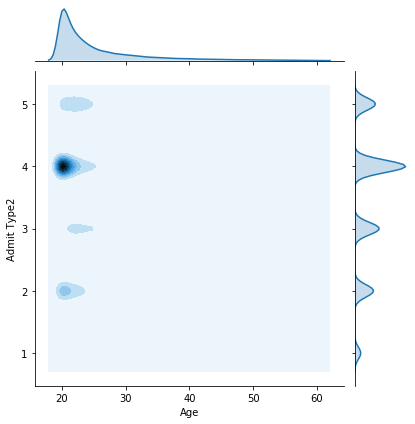

In [178]:
# Jointplot
sns.jointplot(x="Age", y="Admit Type2", data=NonTrad, kind="kde")

When looking at the age distribution for all other admit types, we can see that transfer and international students also tend to be younger and more heavily represented within this population. This is going to be important when taking into account our earlier result of female students tending to be older for admit types other than freshmen. 

### International Cohort Analysis

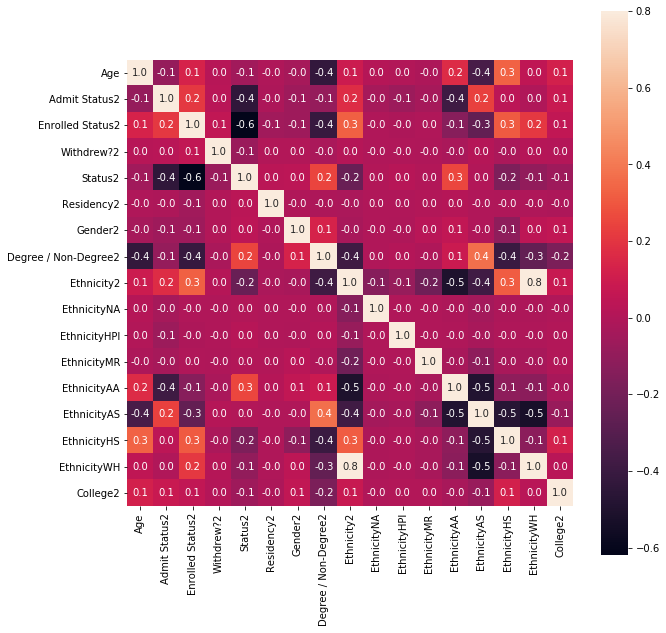

In [179]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Int.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [180]:
# Age & Ethnicity for Freshmen
Int[['Age', 'Ethnicity2']].corr()

,Age,Ethnicity2
Age,1.000000,0.094727
Ethnicity2,0.094727,1.000000


(array([9.130e+02, 6.197e+03, 0.000e+00, 9.600e+02, 0.000e+00, 1.099e+03,
        5.700e+01, 0.000e+00, 4.000e+00, 7.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

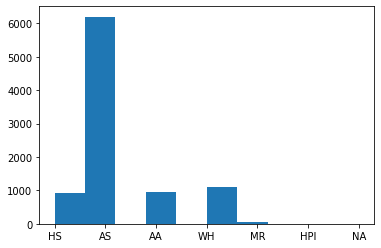

In [181]:
plt.hist(Int['Ethnicity'])

(array([4.132e+03, 2.283e+03, 1.140e+03, 5.620e+02, 3.130e+02, 2.330e+02,
        1.740e+02, 9.700e+01, 8.700e+01, 6.100e+01, 6.000e+01, 2.900e+01,
        2.100e+01, 2.300e+01, 6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00]),
 array([17. , 19.1, 21.2, 23.3, 25.4, 27.5, 29.6, 31.7, 33.8, 35.9, 38. ,
        40.1, 42.2, 44.3, 46.4, 48.5, 50.6, 52.7, 54.8, 56.9, 59. ]),
 <a list of 20 Patch objects>)

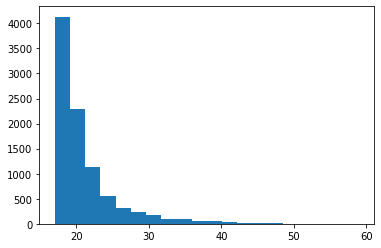

In [182]:
plt.hist(Int['Age'], bins=20)

In [183]:
Int[['College2', 'Age']].corr()

,College2,Age
College2,1.000000,0.121942
Age,0.121942,1.000000


(array([3057.,  459., 2144.,    0., 2368.,  309.,    0.,  544.,  179.,
         177.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

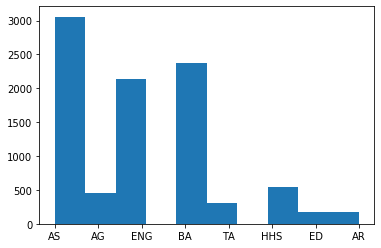

In [184]:
plt.hist(Int['College'])

In [185]:
gen = Int.groupby('Gender').size()
gen

Gender
F    3617
M    5620
dtype: int64

In [186]:
Int[['Gender2', 'College2']].corr()

,Gender2,College2
Gender2,1.000000,0.055443
College2,0.055443,1.000000


In [187]:
Int[['Gender2', 'Ethnicity2']].corr()

,Gender2,Ethnicity2
Gender2,1.000000,-0.029753
Ethnicity2,-0.029753,1.000000


In [188]:
Int[['Gender2', 'Age']].corr()

,Gender2,Age
Gender2,1.000000,-0.035545
Age,-0.035545,1.000000


### 5. Modeling

### Logistic Regression
#### Freshmen

In [189]:
Fresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65448 entries, 0 to 65447
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   65448 non-null  int64         
 1   Gender                65448 non-null  object        
 2   Citizenship           65448 non-null  object        
 3   Ethnicity             65448 non-null  object        
 4   Residency             65448 non-null  object        
 5   College               65448 non-null  object        
 6   Degree / Non-Degree   65448 non-null  object        
 7   Status                65448 non-null  object        
 8   Application Date      65448 non-null  datetime64[ns]
 9   Admit Status          65448 non-null  object        
 10  Enrolled Status       65448 non-null  object        
 11  Withdrew?             65448 non-null  object        
 12  Admit Status2         65448 non-null  int64         
 13  Enrolled Status2

In [224]:
Fresh2 = Fresh.drop(['Gender', 'Citizenship', 'Ethnicity', 'Residency', 'College', 
                      'Degree / Non-Degree', 'Status', 'Application Date', 'Admit Status', 'Enrolled Status', 
                     'Withdrew?', 'Admit Status2', 'Enrolled Status2', 'Withdrew?2', 'Status2', 'Residency2',
                     'Degree / Non-Degree2'], axis=1)
NonTrad2 = NonTrad.drop(['Gender', 'Citizenship', 'Ethnicity', 'Residency', 'College', 
                      'Degree / Non-Degree', 'Status', 'Application Date', 'Admit Status', 'Enrolled Status', 
                     'Withdrew?', 'Admit Status2', 'Enrolled Status2', 'Withdrew?2', 'Status2', 'Residency2',
                     'Degree / Non-Degree2'], axis=1)
Int2 = Int.drop(['Gender', 'Citizenship', 'Ethnicity', 'Residency', 'College', 
                      'Degree / Non-Degree', 'Status', 'Application Date', 'Admit Status', 'Enrolled Status', 
                     'Withdrew?', 'Admit Status2', 'Enrolled Status2', 'Withdrew?2', 'Status2', 'Residency2',
                     'Degree / Non-Degree2'], axis=1)

In [191]:
y = Fresh2['Gender2']
X = Fresh2.drop(['Gender2', 'Ethnicity2'], axis=1)

In [192]:
X.head(2)

,Age,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2
0,19,0,0,0,0,0,0,1,6
1,19,0,0,0,0,1,0,0,3


In [193]:
# Train and test sets and building a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
#Model evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.5651133180544945

In [195]:
confusion_matrix(y_test, lr.predict(X_test))

array([[9106, 1262],
       [7277, 1990]], dtype=int64)

In [196]:
from sklearn.metrics import classification_report
clss = classification_report(y_test, lr.predict(X_test))

In [197]:
print (clss)

              precision    recall  f1-score   support

           0       0.56      0.88      0.68     10368
           1       0.61      0.21      0.32      9267

    accuracy                           0.57     19635
   macro avg       0.58      0.55      0.50     19635
weighted avg       0.58      0.57      0.51     19635



In [198]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,lr.predict(X_test))

0.5465098989744573

We can see that the model is not doing such a good job at determining gender based on the factors of age, ethnicity, and college:<br>
**Model Accuracy: 56.4%**<br>
**True positives out of all positives: .55**<br>
**False positives out of all negatives: .61**<br>
**AUC Score: .546**

#### Non-Traditional

In [199]:
y1 = NonTrad2['Gender2']
X1 = NonTrad2.drop(['Gender2', 'Ethnicity2'], axis=1)

In [200]:
X1.head(2)

,Age,Admit Type2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2
0,60,3,0,0,0,1,0,0,0,6
1,60,3,0,0,0,0,0,0,1,5


In [201]:
# Train and test sets and building a logistic regression model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=10)
lr = LogisticRegression()
lr.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
accuracy_score(y1_test, lr.predict(X1_test))

0.5527250583578606

In [203]:
confusion_matrix(y1_test, lr.predict(X1_test))

array([[1623, 3103],
       [1304, 3823]], dtype=int64)

In [204]:
clss1 = classification_report(y1_test, lr.predict(X1_test))

In [205]:
print(clss1)

              precision    recall  f1-score   support

           0       0.55      0.34      0.42      4726
           1       0.55      0.75      0.63      5127

    accuracy                           0.55      9853
   macro avg       0.55      0.54      0.53      9853
weighted avg       0.55      0.55      0.53      9853



In [206]:
roc_auc_score(y1_test,lr.predict(X1_test))

0.544539806147716

Our model for non-traditional students actually performed worse and only has an accuracy score of 55.3%. 

### Let's take a look at college predictors 

In [225]:
# Prepping - adding columns for each college for each student cohort
Fresh2['CollegeAS'] = Fresh['College'].map({'AS': 1, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Fresh2['CollegeAG'] = Fresh['College'].map({'AS': 0, 'AG':1,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Fresh2['CollegeAR'] = Fresh['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 1, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Fresh2['CollegeBA'] = Fresh['College'].map({'AS': 0, 'AG':0,'BA': 1, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Fresh2['CollegeED'] = Fresh['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':1, 'ENG':0 })
Fresh2['CollegeENG'] = Fresh['College'].map({'AS':0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':1 })
Fresh2['CollegeHHS'] = Fresh['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 1, 'TA':0, 'ED':0, 'ENG':0 })
Fresh2['CollegeTA'] = Fresh['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':1, 'ED':0, 'ENG':0 })

NonTrad2['CollegeAS'] = NonTrad['College'].map({'AS': 1, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
NonTrad2['CollegeAG'] = NonTrad['College'].map({'AS': 0, 'AG':1,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
NonTrad2['CollegeAR'] = NonTrad['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 1, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
NonTrad2['CollegeBA'] = NonTrad['College'].map({'AS': 0, 'AG':0,'BA': 1, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
NonTrad2['CollegeED'] = NonTrad['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':1, 'ENG':0 })
NonTrad2['CollegeENG'] = NonTrad['College'].map({'AS':0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':1 })
NonTrad2['CollegeHHS'] = NonTrad['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 1, 'TA':0, 'ED':0, 'ENG':0 })
NonTrad2['CollegeTA'] = NonTrad['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':1, 'ED':0, 'ENG':0 })

Int2['CollegeAS'] = Int['College'].map({'AS': 1, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Int2['CollegeAG'] = Int['College'].map({'AS': 0, 'AG':1,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Int2['CollegeAR'] = Int['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 1, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Int2['CollegeBA'] = Int['College'].map({'AS': 0, 'AG':0,'BA': 1, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':0 })
Int2['CollegeED'] = Int['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':1, 'ENG':0 })
Int2['CollegeENG'] = Int['College'].map({'AS':0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':0, 'ED':0, 'ENG':1 })
Int2['CollegeHHS'] = Int['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 1, 'TA':0, 'ED':0, 'ENG':0 })
Int2['CollegeTA'] = Int['College'].map({'AS': 0, 'AG':0,'BA': 0, 'AR': 0, 'HHS': 0, 'TA':1, 'ED':0, 'ENG':0 })

In [208]:
Fresh2.head()

,Age,Gender2,Ethnicity2,EthnicityNA,EthnicityHPI,EthnicityMR,EthnicityAA,EthnicityAS,EthnicityHS,EthnicityWH,College2,CollegeAS,CollegeAG,CollegeAR,CollegeBA,CollegeED,CollegeENG,CollegeHHS,CollegeTA
0,19,0,7,0,0,0,0,0,0,1,6,0,0,0,1,0,0,0,0
1,19,1,5,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0,0
2,19,1,7,0,0,0,0,0,0,1,6,0,0,0,1,0,0,0,0
3,19,1,5,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0,0
4,19,0,7,0,0,0,0,0,0,1,8,1,0,0,0,0,0,0,0


In [211]:
Fresh2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65448 entries, 0 to 65447
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           65448 non-null  int64
 1   Gender2       65448 non-null  int64
 2   Ethnicity2    65448 non-null  int64
 3   EthnicityNA   65448 non-null  int64
 4   EthnicityHPI  65448 non-null  int64
 5   EthnicityMR   65448 non-null  int64
 6   EthnicityAA   65448 non-null  int64
 7   EthnicityAS   65448 non-null  int64
 8   EthnicityHS   65448 non-null  int64
 9   EthnicityWH   65448 non-null  int64
 10  College2      65448 non-null  int64
 11  CollegeAS     65448 non-null  int64
 12  CollegeAG     65448 non-null  int64
 13  CollegeAR     65448 non-null  int64
 14  CollegeBA     65448 non-null  int64
 15  CollegeED     65448 non-null  int64
 16  CollegeENG    65448 non-null  int64
 17  CollegeHHS    65448 non-null  int64
 18  CollegeTA     65448 non-null  int64
dtypes: int64(19)
memory usage

#### 1: College of Arts & Sciences (AS)

In [214]:
# Statsmodels for logit function
yfas = Fresh2['CollegeAS']
Xfas = Fresh2.drop(['CollegeAS','CollegeAG','CollegeAR','CollegeBA','CollegeED','CollegeENG','CollegeHHS',
                    'CollegeTA','College2','Ethnicity2'], axis=1)

In [215]:
fas_logit = sm.Logit(yfas, Xfas) 
fas_model_logit = fas_logit.fit()

Optimization terminated successfully.
         Current function value: 0.634485
         Iterations 5


In [217]:
pre = fas_model_logit.predict()
for i in pre:
    print(i)

0.40465571404289336
0.27777967179575
0.2529941495621612
0.27777967179575
0.40465571404289336
0.2529941495621612
0.40465571404289336
0.32526595952703036
0.40465571404289336
0.48878984069233855
0.2529941495621612
0.2529941495621612
0.5544923385230843
0.40465571404289336
0.48878984069233855
0.2529941495621612
0.40465571404289336
0.2529941495621612
0.32526595952703036
0.5544923385230843
0.2529941495621612
0.2529941495621612
0.27777967179575
0.38278006113450724
0.2529941495621612
0.2529941495621612
0.5544923385230843
0.48878984069233855
0.2529941495621612
0.40465571404289336
0.2529941495621612
0.38278006113450724
0.40465571404289336
0.32268681080212586
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.43563447484211887
0.40465571404289336
0.38278006113450724
0.4917327497947423
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.40465571404289336
0.5544923385230843
0.5544923385230843
0.38278006113450724
0.2529941495621612
0.38278006113450

0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.27953990737724194
0.2571294839304451
0.2571294839304451
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.4942293884213274
0.409909727290959
0.409909727290959
0.4971731967958597
0.5598622997546079
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.409909727290959
0.5598622997546079
0.44099277078245663
0.409909727290959
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.3879351219986739
0.409909727290959
0.409909727290959
0.409909727290959
0.49422

0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3300606561058206
0.409909727290959
0.409909727290959
0.4942293884213274
0.5598622997546079
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.409909727290959
0.409909727290959
0.44099277078245663
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.4942293884213274
0.4971731967958597
0.2571294839304451
0.2571294839

0.409909727290959
0.4971731967958597
0.44099277078245663
0.409909727290959
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3300606561058206
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.3300606561058206
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.44099277078245663
0.409909727290959
0.44099277078245663
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.409909727290959
0.409909727290959
0.40990972

0.4942293884213274
0.4942293884213274
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.409909727290959
0.2821671083088719
0.3274619398434759
0.409909727290959
0.4942293884213274
0.409909727290959
0.4942293884213274
0.409909727290959
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.3879351219986739
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.4377886561394955
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.5598622997546079
0

0.5544923385230843
0.40465571404289336
0.40465571404289336
0.2529941495621612
0.32268681080212586
0.2529941495621612
0.2529941495621612
0.32268681080212586
0.27777967179575
0.2529941495621612
0.32268681080212586
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.43563447484211887
0.4917327497947423
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.32526595952703036
0.38278006113450724
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.4942293884213274
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2

0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0

0.5598622997546079
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.4530674264030421
0.5598622997546079
0.4942293884213274
0.4942293884213274
0.409909727290959
0.3300606561058206
0.2571294839304451
0.3300606561058206
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3300606561058206
0.3300606561058206
0.2571294839304451
0.3274619398434759
0.409909727290959
0.409909727290959
0.5598622997546079
0.4971731967958597
0.4971731967958597
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.409909727290959
0.4530674264030421
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4530674264030421
0.409909727290959
0.559862299

0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3300606561058206
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.4942293884213274
0.409909727290959
0.409909727290959
0.4942293884213274
0.4971731967958597
0.5598622997546079
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.3274619398434759
0.409909727290959
0.4971731967958597
0.4377886561394955
0.2571294839304451
0.2571294839304451
0.3300606561058206
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.4942293884213274
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.4099097272

0.40465571404289336
0.40465571404289336
0.48878984069233855
0.5544923385230843
0.32526595952703036
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.32268681080212586
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.40465571404289336
0.40465571404289336
0.4917327497947423
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.5544923385230843
0.32268681080212586
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.32268681080212586
0.2529941495621612
0.2529941495621612
0.32526595952703036
0.40465571404289336
0.5544923385230843
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.38278006113450724
0.2529941495621612
0.2529941495621612
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.48878984069233855
0.2529941495621612
0.2529941495621612
0.2

0.2571294839304451
0.2571294839304451
0.3300606561058206
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.5598622997546079
0.4971731967958597
0.409909727290959
0.5598622997546079
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.32

0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.44099277078245663
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.4377886561394955
0.409909727290959
0.4942293884213274
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.2821671083088719
0.3274619398434759
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.3300606561058206
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2

0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.409909727290959
0.4942293884213274
0.4971731967958597
0.5598622997546079
0.409909727290959
0.409909727290959
0.409909727290959
0.3274619398434759
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.3274619398434759
0.3274619398434759
0.3879351219986739
0.3274619398434759
0.3274619398434759
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.4971731967958597
0.5598622997546079
0.409909727290959
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.5598622997546079
0.4971731967958597
0.409909727290959
0.4942293884213274
0.409909727290959
0.2571294839304451


0.409909727290959
0.409909727290959
0.409909727290959
0.32268681080212586
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2529941495621612
0.2571294839304451
0.3274619398434759
0.409909727290959
0.409909727290959
0.409909727290959
0.40465571404289336
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.4942293884213274
0.3879351219986739
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.3274619398434759
0.409909727290959
0.409909727290959
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2529941495621612
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2529941495621612

0.4942293884213274
0.409909727290959
0.2571294839304451
0.4971731967958597
0.409909727290959
0.4942293884213274
0.409909727290959
0.3274619398434759
0.3274619398434759
0.40465571404289336
0.409909727290959
0.409909727290959
0.2571294839304451
0.5598622997546079
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2529941495621612
0.4971731967958597
0.2571294839304451
0.409909727290959
0.409909727290959
0.2821671083088719
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.44099277078245663
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2529941495621612
0.409909727290959
0.40465571404289336
0.409909727290959
0.409909727290959
0.44099277078245663
0.2571294839304451
0.2529941495621612
0.409909727290959


0.409909727290959
0.2529941495621612
0.2529941495621612
0.40465571404289336
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.4942293884213274
0.40465571404289336
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.4971731967958597
0.409909727290959
0.41518438419421216
0.3300606561058206
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.4917327497947423
0.3274619398434759
0.2571294839304451
0.2821671083088719
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2529941495621612
0.3879351219986739
0.43563447484211887
0.3879351219986739
0.2571294839304451
0.48878984069233855
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.409909727290959
0.32268681080212586
0.2529941495621612
0.4942293884213274
0.409909727290959
0.2571294839304451
0.2821671083088719
0.409909727290959
0.3879351219986739
0.2571294839304451
0.2571294839304451
0.4

0.409909727290959
0.409909727290959
0.2571294839304451
0.2821671083088719
0.409909727290959
0.40465571404289336
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.4942293884213274
0.40465571404289336
0.3879351219986739
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.48878984069233855
0.409909727290959
0.5652182868724049
0.4942293884213274
0.409909727290959
0.4942293884213274
0.2571294839304451
0.409909727290959
0.4942293884213274
0.44099277078245663
0.5598622997546079
0.32268681080212586
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.4942293884213274
0.3274619398434759
0.2821671083088719
0.2571294839304451
0.32268681080212586
0.32268681080212586
0.2571294839304451
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.4942293884213274
0.41518438419421216
0.3274619398434759
0.2571294839304451
0.5598622997546079
0.3274619398434759
0.409909727290959

0.409909727290959
0.2529941495621612
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.5598622997546079
0.4971731967958597
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.3879351219986739
0.3300606561058206
0.32268681080212586
0.2571294839304451
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.2529941495621612
0.2571294839304451
0.2529941495621612
0.409909727290959
0.409909727290959
0.2529941495621612
0.409909727290959
0.2571294839304451
0.2529941495621612
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.4942293884213274
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.3300606561058206
0.49967030263368967
0.40990972729095

0.2571294839304451
0.4971731967958597
0.2529941495621612
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.41518438419421216
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.4942293884213274
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.2529941495621612
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.409909727290959
0.2571294839304451
0.4971731967958597
0.2571294839304451
0.2529941495621612
0.49967030263368967
0.409909727290959
0.40465571404289336
0.2821671083088719
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.4942293884213274
0.2571294839304451
0.409909727290959
0.44099277078245663
0.40465571404289336
0.409909727290959
0.40990972

0.2571294839304451
0.5598622997546079
0.409909727290959
0.4971731967958597
0.41518438419421216
0.3879351219986739
0.409909727290959
0.2571294839304451
0.38278006113450724
0.409909727290959
0.40465571404289336
0.409909727290959
0.2571294839304451
0.4971731967958597
0.4942293884213274
0.409909727290959
0.2571294839304451
0.409909727290959
0.4942293884213274
0.409909727290959
0.32268681080212586
0.38278006113450724
0.40465571404289336
0.4942293884213274
0.48878984069233855
0.409909727290959
0.2571294839304451
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.3274619398434759
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.4971731967958597
0.2571294839304451
0.2571294839304451
0.409909727290959
0.3274619398434759
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2529941495621612
0.4971731967958597
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.257

0.5598622997546079
0.2571294839304451
0.4971731967958597
0.2571294839304451
0.409909727290959
0.409909727290959
0.2571294839304451
0.3274619398434759
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2613087676303914
0.5598622997546079
0.2571294839304451
0.40465571404289336
0.409909727290959
0.409909727290959
0.2571294839304451
0.4942293884213274
0.3300606561058206
0.2571294839304451
0.409909727290959
0.40465571404289336
0.3300606561058206
0.5598622997546079
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2529941495621612
0.3274619398434759
0.4942293884213274
0.409909727290959
0.3879351219986739
0.40465571404289336
0.2529941495621612
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.2571294839304451
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.40465571404289336
0.409909727290959
0.409909727290959
0.4971731967958597
0.2529941495621612

0.409909727290959
0.3274619398434759
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2529941495621612
0.409909727290959
0.409909727290959
0.44099277078245663
0.2571294839304451
0.32268681080212586
0.409909727290959
0.5598622997546079
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.40465571404289336
0.2571294839304451
0.409909727290959
0.2571294839304451
0.40465571404289336
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.27953990737724194
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.5598622997546079
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.4099097272

0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.409909727290959
0.40465571404289336
0.2571294839304451
0.4971731967958597
0.40465571404289336
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.48878984069233855
0.409909727290959
0.409909727290959
0.40465571404289336
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.409909727290959
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.44099277078245663
0.409909727290959
0.2571294839304451
0.409909727290959
0.40465571404289336
0.40465571404289336
0.40465571404289336
0.409909727290959
0.2571294839304451
0.409909727290959
0.2529941495621612
0.2571294839304451
0.3879351219986739
0.4971731967958597
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.

0.409909727290959
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.32268681080212586
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.40465571404289336
0.44099277078245663
0.40465571404289336
0.44099277078245663
0.2571294839304451
0.409909727290959
0.4971731967958597
0.409909727290959
0.409909727290959
0.4942293884213274
0.40465571404289336
0.5544923385230843
0.4942293884213274
0.4942293884213274
0.409909727290959
0.44099277078245663
0.2571294839304451
0.3300606561058206
0.5598622997546079
0.409909727290959
0.2571294839304451
0.2571294839304451
0.4942293884213274
0.4942293884213274
0.4971731967958597
0.409909727290959
0.2571294839304451
0.2529941495621612
0.2613087676303914
0.409909727290959
0.409909727290959
0.5598622997546079
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2529941495621612
0.3274619398434759
0.2571294839304451
0

0.409909727290959
0.5598622997546079
0.2821671083088719
0.4942293884213274
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.2529941495621612
0.409909727290959
0.409909727290959
0.2571294839304451
0.27777967179575
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2529941495621612
0.4971731967958597
0.2571294839304451
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.4971731967958597
0.41518438419421216
0.5598622997546079
0.4942293884213274
0.2571294839304451
0.4942293884213274
0.409909727290959
0.2529941495621612
0.3879351219986739
0.2571294839304451
0.4942293884213274
0.3274619398434759
0.32268681080212586
0.4942293884213274
0.409909727290959
0.40465571404289336
0.3879351219986739
0.409909727290959
0.5598622997546079
0.2821671083088719
0.2571294839304451
0.44099277078245663
0.2571294839304451
0.2571294839304451
0.38278006113450724
0.4971731967958597
0.2529941495621612
0.409909727290959
0.3300606561058206
0.4942293884213274
0.40

0.5544923385230843
0.2529941495621612
0.2571294839304451
0.409909727290959
0.2571294839304451
0.32526595952703036
0.409909727290959
0.40465571404289336
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.5652182868724049
0.41518438419421216
0.409909727290959
0.3879351219986739
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.4971731967958597
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.5026143132529934
0.2571294839304451
0.409909727290959
0.4942293884213274
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.40465571404289336
0.409909727290959
0.409909727290959
0.33227306611435065
0.2571294839304451
0.40465571404289336
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909

0.2571294839304451
0.40465571404289336
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.4942293884213274
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2751776615500302
0.2529941495621612
0.2571294839304451
0.40465571404289336
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.2571294839304451
0.409909727290959
0.40465571404289336
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.3300606561058206
0.409909727290959
0.3879351219986739
0.3879351219986739
0.409909727290959
0.3274619398434759
0.409909727290959
0.4917327

0.40465571404289336
0.409909727290959
0.40465571404289336
0.43563447484211887
0.2529941495621612
0.2571294839304451
0.409909727290959
0.409909727290959
0.40465571404289336
0.40465571404289336
0.4942293884213274
0.409909727290959
0.409909727290959
0.44099277078245663
0.5598622997546079
0.409909727290959
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.3274619398434759
0.3300606561058206
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.5598622997546079
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.40465571404289336
0.2529941495621612
0.32268681080212586
0.4971731967958597
0.5598622997546079
0.3274619398434759
0.2571294839304451
0.4942293884213274
0.2571294839304451
0.2529941495621612
0.44099277078245663
0.5598622997546079
0.2571294839304451
0.2571294839304451
0.409909727290959
0.559

0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.3879351219986739
0.3274619398434759
0.409909727290959
0.409909727290959
0.2571294839304451
0.4942293884213274
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.40465571404289336
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.2821671083088719
0.409909727290959
0.409909727290959
0.2529941495621612
0.2571294839304451
0.5544923385230843
0.2529941495621612
0.2571294839304451
0.3879351219986739
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.5598622997546079
0.2571294839304451
0.2529941495621612
0.4917327497947423
0.2571294839304451
0.2571294839304451
0.40465571404289336
0.5598622997546079
0.409909727290959
0.5598622997546079
0.2529941495621612
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.5598622997546079
0.3274619398434759
0.3879351219986739
0.409

0.2529941495621612
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.4942293884213274
0.409909727290959
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.40465571404289336
0.4971731967958597
0.41518438419421216
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2529941495621612
0.40465571404289336
0.40465571404289336
0.2571294839304451
0.409909727290959
0.40465571404289336
0.409909727290959
0.38278006113450724
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.409909727290959
0.2571294839304451
0.40465571404289336
0.2529941495621612
0.409909727290959
0.409909727290959
0.2571294839304451
0.40465571404289336
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.2571294839304451
0.409909727290959


0.2571294839304451
0.409909727290959
0.2571294839304451
0.4942293884213274
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.3274619398434759
0.4942293884213274
0.3274619398434759
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2529941495621612
0.2571294839304451
0.2529941495621612
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.5598622997546079
0.2571294839304451
0.41518438419421216
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.3879351219986739
0.2529941495621612
0.2529941495621612
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.409909727290959
0.2571294839304451
0.33227306611435065
0.3300606561058206
0.2571294839304451
0.2571294839304451
0.2529941495621612
0.4

0.4971731967958597
0.2529941495621612
0.409909727290959
0.5598622997546079
0.2571294839304451
0.2571294839304451
0.3274619398434759
0.409909727290959
0.4971731967958597
0.2571294839304451
0.2529941495621612
0.5598622997546079
0.2571294839304451
0.409909727290959
0.409909727290959
0.2529941495621612
0.2571294839304451
0.4971731967958597
0.40465571404289336
0.409909727290959
0.409909727290959
0.32268681080212586
0.409909727290959
0.2571294839304451
0.409909727290959
0.2571294839304451
0.409909727290959
0.409909727290959
0.4971731967958597
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.409909727290959
0.409909727290959
0.409909727290959
0.409909727290959
0.2571294839304451
0.40465571404289336
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2529941495621612
0.4942293884213274
0.2529941495621612
0.40465571404289336
0.409909727290959
0.2529941495621612
0.2571294839304451
0.252994

0.2571294839304451
0.4377886561394955
0.2529941495621612
0.2571294839304451
0.40465571404289336
0.409909727290959
0.3274619398434759
0.3274619398434759
0.409909727290959
0.2529941495621612
0.409909727290959
0.409909727290959
0.2529941495621612
0.2571294839304451
0.2571294839304451
0.38278006113450724
0.3274619398434759
0.4942293884213274
0.3274619398434759
0.4942293884213274
0.409909727290959
0.3274619398434759
0.409909727290959
0.409909727290959
0.4942293884213274
0.2571294839304451
0.2529941495621612
0.409909727290959
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.5598622997546079
0.409909727290959
0.3274619398434759
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571294839304451
0.2571294839304451
0.40465571404289336
0.2571294839304451
0.409909727290959
0.3274619398434759
0.409909727290959
0.4942293884213274
0.409909727290959
0.2571294839304451
0.2571294839304451
0.2571294839304451
0.409909727290959
0.2571

In [218]:
fas_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              CollegeAS   No. Observations:                65448
Model:                          Logit   Df Residuals:                    65439
Method:                           MLE   Df Model:                            8
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.02652
Time:                        18:53:40   Log-Likelihood:                -41526.
converged:                       True   LL-Null:                       -42657.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0218      0.021     -1.040      0.298      -0.063       0.019
Gender2         -0.6966      0.017    -41.166      0.000      -0.730      -0.663
EthnicityNA      0.1416      0.399      0.355      0.722      -0.639       0.923
EthnicityHPI     0.2035      0.447      0.455      0.649      -0.673       1.080
EthnicityMR      0.3805      0.380      1.001      0.317      -0.364       1.125
EthnicityAA      0.6324      0.379      1.669      0.095      -0.110       1.375
EthnicityAS      0.1546      0.382      0.405      0.685      -0.593       0.902
EthnicityHS      0.3687      0.379      0.973      0.331      -0.374       1.112
EthnicityWH      0.0274      0.379      0.072      0.942      -0.716       0.771
================================================================================
"""

In [219]:
fas_model_logit.pred_table()

array([[41114.,   958.],
       [22159.,  1217.]])

In [220]:
# Statsmodels for logit function
yntas = NonTrad2['CollegeAS']
Xntas = NonTrad2.drop(['CollegeAS','CollegeAG','CollegeAR','CollegeBA','CollegeED','CollegeENG','CollegeHHS',
                    'CollegeTA','College2','Ethnicity2'], axis=1)

In [221]:
ntas_logit = sm.Logit(yntas, Xntas) 
ntas_model_logit = ntas_logit.fit()

Optimization terminated successfully.
         Current function value: 0.634760
         Iterations 5


In [222]:
ntas_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              CollegeAS   No. Observations:                32842
Model:                          Logit   Df Residuals:                    32832
Method:                           MLE   Df Model:                            9
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.01470
Time:                        18:54:55   Log-Likelihood:                -20847.
converged:                       True   LL-Null:                       -21158.
Covariance Type:            nonrobust   LLR p-value:                4.082e-128
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0018      0.002     -1.047      0.295      -0.005       0.002
Admit Type2      0.1879      0.012     15.533      0.000       0.164       0.212
Gender2         -0.0888      0.024     -3.768      0.000      -0.135      -0.043
EthnicityNA     -1.0042      0.155     -6.480      0.000      -1.308      -0.700
EthnicityHPI    -0.9466      0.245     -3.861      0.000      -1.427      -0.466
EthnicityMR     -1.0285      0.090    -11.401      0.000      -1.205      -0.852
EthnicityAA     -0.7658      0.075    -10.208      0.000      -0.913      -0.619
EthnicityAS     -1.1593      0.063    -18.325      0.000      -1.283      -1.035
EthnicityHS     -0.7867      0.073    -10.848      0.000      -0.929      -0.645
EthnicityWH     -1.3782      0.068    -20.201      0.000      -1.512      -1.244
================================================================================
"""

In [223]:
fas_model_logit.pred_table()

array([[41114.,   958.],
       [22159.,  1217.]])

#### International

In [226]:
yint = Int2['CollegeAS']
Xint = Int2.drop(['CollegeAS','CollegeAG','CollegeAR','CollegeBA','CollegeED','CollegeENG','CollegeHHS',
                    'CollegeTA','College2','Ethnicity2'], axis=1)

In [227]:
int_logit = sm.Logit(yint, Xint) 
int_model_logit = int_logit.fit()

Optimization terminated successfully.
         Current function value: 0.594169
         Iterations 5


In [228]:
int_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              CollegeAS   No. Observations:                 9237
Model:                          Logit   Df Residuals:                     9228
Method:                           MLE   Df Model:                            8
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.06408
Time:                        19:00:44   Log-Likelihood:                -5488.3
converged:                       True   LL-Null:                       -5864.1
Covariance Type:            nonrobust   LLR p-value:                5.685e-157
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0899      0.006     15.680      0.000       0.079       0.101
Gender2         -0.4444      0.047     -9.445      0.000      -0.537      -0.352
EthnicityNA     -2.8715      0.893     -3.214      0.001      -4.622      -1.121
EthnicityHPI    -1.8465      1.026     -1.800      0.072      -3.858       0.164
EthnicityMR     -2.4873      0.326     -7.633      0.000      -3.126      -1.849
EthnicityAA     -2.3443      0.156    -15.056      0.000      -2.650      -2.039
EthnicityAS     -2.4877      0.122    -20.327      0.000      -2.728      -2.248
EthnicityHS     -1.5730      0.158     -9.982      0.000      -1.882      -1.264
EthnicityWH     -2.4487      0.145    -16.849      0.000      -2.734      -2.164
================================================================================
"""

In [229]:
int_model_logit.pred_table()

array([[5894.,  286.],
       [2410.,  647.]])

*** Will Continue Models for each college ***